# Read raiting CSV and drop the un-used item;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rating = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
rating.dropna(subset=["userId"], inplace = True)
rating.dropna(subset=["rating"], inplace = True)
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
products.dropna(subset=["product_name"], inplace = True)
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [2]:
display(rating.head())

,userId,productId,rating
0,15905.0,452609,5.0
1,94522.0,452609,5.0
2,317087.0,452609,5.0
3,1329103.0,452609,5.0
4,502593.0,452609,5.0


# See how the data distributed

In [3]:
display(rating.describe())
print('No. of Unique Users    :', rating.userId.nunique())
print('No. of Unique Products :', rating.productId.nunique())
print('No. of Unique Ratings  :', rating.rating.nunique())

,userId,productId,rating
count,7.202839e+06,7.202839e+06,7.202839e+06
mean,3.368837e+05,2.651388e+05,4.277311e+00
std,3.619076e+05,1.525957e+05,1.060729e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.653000e+04,1.331880e+05,4.000000e+00
50%,1.915990e+05,2.667810e+05,5.000000e+00
75%,5.283595e+05,3.965955e+05,5.000000e+00
max,1.424594e+06,5.256180e+05,5.000000e+00


No. of Unique Users    : 1424595
No. of Unique Products : 525619
No. of Unique Ratings  : 6


In [4]:
ratingViaUserCount = rating.groupby(by=['rating']).agg({'userId': 'count'}).reset_index()
ratingViaUserCount.columns = ['rating', 'Count']

# See the rating distribution

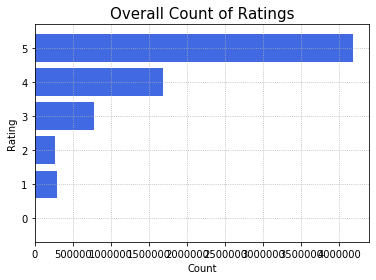

In [5]:
plt.barh(ratingViaUserCount.rating, ratingViaUserCount.Count, color='royalblue')
plt.title('Overall Count of Ratings', fontsize=15)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.grid(ls='dotted')
plt.show()

# Filter out some edge data, which the product has been rated less than 100 times and the users rate smaller than 50 times

In [6]:
userRatingCount = rating['userId'].value_counts();
ratingFiltered = rating[rating['userId'].isin(userRatingCount[userRatingCount >= 50 ].index)]
print(ratingFiltered.shape)
print(rating.shape)
productRatingCount = rating['productId'].value_counts();
ratingFiltered = ratingFiltered[ratingFiltered['userId'].isin(productRatingCount[productRatingCount >= 100 ].index)]
print(ratingFiltered.shape)

(1847803, 3)
(7202839, 3)
(35024, 3)


# Use pivot to transform the data to user-item-rating matrix

In [7]:
ratingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
ratingFilteredPivot = ratingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)
display(ratingFilteredPivot)

productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
47.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
693.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
858.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Find users n number neighors for using cosine similarity
[Use sklearn Unsupervised Nearest Neighbors to find the Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

In [9]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
#user based:
raitingFilteredMatrix = csr_matrix(ratingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

userId = 127020
queryIndex = ratingFilteredPivot.index.get_loc(userId)
distances, indices = model_knn.kneighbors(ratingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=21)

print('Recommendations for User({0}) :\n'.format( ratingFilteredPivot.iloc[queryIndex].name ))

for i in range(0, len(distances.flatten())):
      print('{0}: User({1}) , with distance of {2}:'.format(i, 
                                                            ratingFilteredPivot.iloc[indices.flatten()[i]].name,
                                                            distances.flatten()[i]))

Recommendations for User(127020.0) :

0: User(127020.0) , with distance of 0.0:
1: User(127579.0) , with distance of 0.32522736007593467:
2: User(6267.0) , with distance of 0.4229442986221119:
3: User(12195.0) , with distance of 0.5992337220460817:
4: User(48026.0) , with distance of 0.6128328059331198:
5: User(35965.0) , with distance of 0.6626272956018002:
6: User(208308.0) , with distance of 0.673345261442672:
7: User(4962.0) , with distance of 0.7344362683688866:
8: User(24514.0) , with distance of 0.759798747140776:
9: User(49066.0) , with distance of 0.8052903534845025:
10: User(1355.0) , with distance of 0.8495111279209696:
11: User(6107.0) , with distance of 0.8762833478550394:
12: User(10980.0) , with distance of 0.8774502467436128:
13: User(2277.0) , with distance of 0.8937147092928615:
14: User(270.0) , with distance of 0.9026208065538522:
15: User(6502.0) , with distance of 0.909596229869691:
16: User(15596.0) , with distance of 0.9279969971927688:
17: User(5693.0) , with d

# Base on those users, predict the user's interesting items by using the weighted formula:
![title](weighted_recom.png)

In [10]:
prediction=0
similarities = 1-distances.flatten()
sum_wt = np.sum(similarities)
wtd_sum = 0 
tempUserId = userId
notRatedItems = np.setdiff1d(ratingFilteredPivot.columns.to_numpy() , ratingFilteredPivot[ (ratingFilteredPivot.index == tempUserId) ].iloc[0].nonzero()[0] )
simArray = np.array([similarities]).T * ratingFilteredPivot.ix[indices.flatten()].filter(notRatedItems.tolist()).to_numpy()
sortedIndex = (simArray.sum(axis=0)/sum_wt).argsort()[::-1][:10]
for index , productId in enumerate(sortedIndex.tolist()):
    print('({0}). Prediction of User({1}): ProductId({2}) {3} ( {2} | {5} | {6} ):'.format(index,
                                                                                           tempUserId,
                                                                                           notRatedItems[productId],
                                                                                           products.loc[notRatedItems[productId]].product_name,
                                                                                           products.loc[notRatedItems[productId]].cat1_name,
                                                                                           products.loc[notRatedItems[productId]].cat2_name,
                                                                                           products.loc[notRatedItems[productId]].cat3_name ))


(0). Prediction of User(127020): ProductId(306453) 中国古典四大名著:三国演义 ( 306453 | 文学艺术 | 小说 ):
(1). Prediction of User(127020): ProductId(262020) 三国演义 ( 262020 | 文学艺术 | 小说 ):
(2). Prediction of User(127020): ProductId(249344) 三国演义 ( 249344 | 少儿/教育图书 | 少儿 ):
(3). Prediction of User(127020): ProductId(63040) 三国演义 ( 63040 | 文学艺术 | 小说 ):
(4). Prediction of User(127020): ProductId(344473) 三国演义 ( 344473 | 少儿/教育图书 | 中小学教辅 ):
(5). Prediction of User(127020): ProductId(427323) 三国演义 ( 427323 | 文学艺术 | 小说 ):
(6). Prediction of User(127020): ProductId(442353) 三国演义 ( 442353 | 文学艺术 | 小说 ):
(7). Prediction of User(127020): ProductId(75596) 三国演义 ( 75596 | 文学艺术 | 小说 ):
(8). Prediction of User(127020): ProductId(140482) 三国演义 ( 140482 | 文学艺术 | 小说 ):
(9). Prediction of User(127020): ProductId(383918) 三国演义(学生版) ( 383918 | 文学艺术 | 小说 ):


C:\Users\kimwong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
C:\Users\kimwong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
